# Defining common photonic crystal structures

This notebook contains grab-and-go functions of popular periodic structures commonly used in photonic crystals and other photonic devices: square/hexagonal arrays of cylinders, slabs with square/hexagonal arrays of holes, rectangular grating, L and H cavities, wood pile, and FCC/BCC crystals. Users can directly copy these pre-defined functions to your own script and use them directly in building your simulations. More importantly, users can learn the workflow from these examples and build your own periodic [Structures](https://docs.flexcompute.com/projects/tidy3d/en/latest/api/_autosummary/tidy3d.Structure.html) using the same principles.

For photonic crystal related case studies, please see the [band structure calculation](https://www.flexcompute.com/tidy3d/examples/notebooks/Bandstructure/), the [optimized L3 cavity](https://www.flexcompute.com/tidy3d/examples/notebooks/OptimizedL3/), and the [waveguide polarization filter](https://www.flexcompute.com/tidy3d/examples/notebooks/PhotonicCrystalWaveguidePolarizationFilter/).

For how to define common photonic integrated circuit components, please see [here](https://www.flexcompute.com/tidy3d/examples/notebooks/PICComponents/).

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tidy3d as td

## Square Array of Cylinders 

The function `square_cylinder_array` returns a square array of cylinders with tunable radius, spacing in both x and y directions, height, and array dimensions.

In [2]:
def square_cylinder_array(
    x0,
    y0,
    z0,
    R,
    hole_spacing_x,
    hole_spacing_y,
    n_x,
    n_y,
    height,
    medium,
    reference_plane="bottom",
    sidewall_angle=0,
    axis=2,
):
    # parameters
    # ------------------------------------------------------------
    # x0: x coordinate of center of the array (um)
    # y0: y coordinate of center of the array (um)
    # z0: z coordinate of center of the array (um)
    # R: radius of the circular holes (um)
    # hole_spacing_x: distance between centers of holes in x direction (um)
    # hole_spacing_y: distance between centers of holes in y direction (um)
    # n_x: number of holes in x direction
    # n_y: number of holes in y direction
    # height: height of array
    # medium: medium of the cylinders
    # reference_plane
    # sidewall_angle: angle slant of cylinders
    # axis

    cylinder_group = []

    start_x, start_y = x0 + hole_spacing_x * (1 - n_x) / 2, y0 + hole_spacing_y * (1 - n_y) / 2
    for i in range(0, n_x):
        for j in range(0, n_y):
            c = td.Cylinder(
                axis=axis,
                sidewall_angle=sidewall_angle,
                reference_plane=reference_plane,
                radius=R,
                center=(start_x + i * hole_spacing_x, start_y + j * hole_spacing_y, z0),
                length=height,
            )
            cylinder_group.append(c)

    structure = td.Structure(geometry=td.GeometryGroup(geometries=cylinder_group), medium=medium)

    return structure

To demonstrate an example, we use the `square_cylinder_array` function and put it into an empty simulation for visualization purposes. By using the `plot_3d` method of the [Simulation](https://docs.flexcompute.com/projects/tidy3d/en/latest/api/_autosummary/tidy3d.Simulation.html) object, we can visualize the defined structures in 3D.

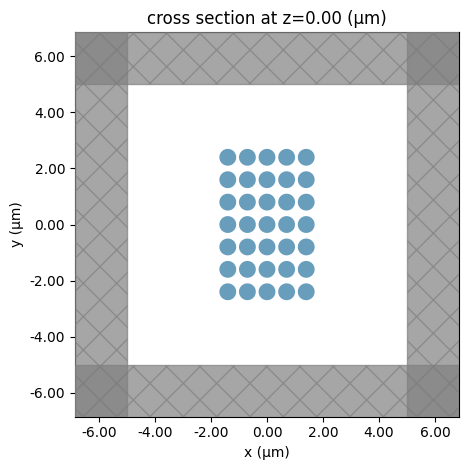

In [3]:
s = square_cylinder_array(0, 0, 0, 0.3, 0.7, 0.8, 5, 7, 0.4, td.Medium(permittivity=3.48**2))

sim = td.Simulation(
    size=[10, 10, 3],
    grid_spec=td.GridSpec.auto(wavelength=1.55),
    structures=[s],
    run_time=1,
)

sim.plot(z=0)
plt.show()

## Hexagonal Array of Cylinders

The function `hex_cylinder_array` returns a hexagonal array of cylinders with tunable radius, spacing in both x and y directions, height, and array dimensions.

In [4]:
def hex_cylinder_array(
    x0,
    y0,
    z0,
    R,
    hole_spacing_x,
    hole_spacing_y,
    n_x,
    n_y,
    height,
    medium,
    reference_plane="bottom",
    sidewall_angle=0,
    axis=2,
):
    # parameters
    # ------------------------------------------------------------
    # x0: x coordinate of center of the array (um)
    # y0: y coordinate of center of the array (um)
    # z0: z coordinate of center of the array (um)
    # R: radius of the circular holes (um)
    # hole_spacing_x: distance between centers of holes in x direction (um)
    # hole_spacing_y: distance between centers of holes in y direction (um)
    # n_x: number of holes in x direction
    # n_y: number of holes in y direction
    # height: height of array
    # medium: medium of the holes
    # reference_plane
    # sidewall_angle: angle slant of cylinders. Add compensation for the box geometry if != 0?
    # axis

    x_slab_length, y_slab_length = hole_spacing_x * (n_x + 0.5), hole_spacing_y * n_y
    start_x, start_y = (
        x0 - x_slab_length / 2 + hole_spacing_x / 2,
        y0 - y_slab_length / 2 + hole_spacing_y / 2,
    )

    cylinders = []

    for i in range(0, n_x):
        for j in range(0, n_y):
            c = td.Cylinder(
                axis=axis,
                sidewall_angle=sidewall_angle,
                reference_plane=reference_plane,
                radius=R,
                center=(
                    start_x + (i + (j % 2) * 0.5) * hole_spacing_x,
                    start_y + j * hole_spacing_y,
                    z0,
                ),
                length=height,
            )
            cylinders.append(c)

    structure = td.Structure(geometry=td.GeometryGroup(geometries=cylinders), medium=medium)

    return structure

<Axes: title={'center': 'cross section at z=0.00 (μm)'}, xlabel='x (μm)', ylabel='y (μm)'>

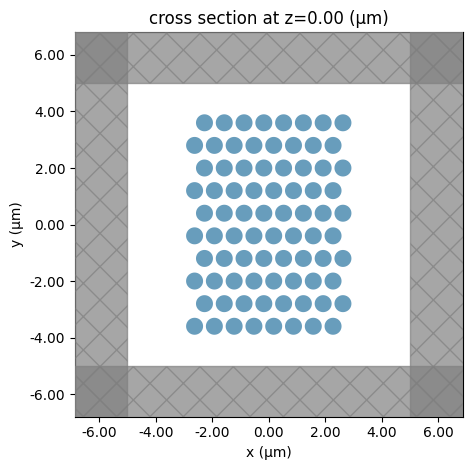

In [5]:
s = hex_cylinder_array(0, 0, 0, 0.3, 0.7, 0.8, 8, 10, 0.4, td.Medium(permittivity=3.48**2))

sim = td.Simulation(
    size=[10, 10, 3],
    grid_spec=td.GridSpec.auto(wavelength=1.55),
    structures=[s],
    run_time=1,
)

sim.plot(z=0)

##  Square Array of Holes

The function `slab_square_array` returns a slab with a square array of holes of separately-defined medium. The slab has a tunable hole radius, spacing in both x and y directions, height, and array dimensions.

In [6]:
def slab_square_array(
    x0,
    y0,
    z0,
    R,
    hole_spacing_x,
    hole_spacing_y,
    n_x,
    n_y,
    height,
    hole_medium,
    slab_medium,
    reference_plane="bottom",
    sidewall_angle=0,
    axis=2,
):
    # parameters
    # ------------------------------------------------------------
    # x0: x coordinate of center of the array (um)
    # y0: y coordinate of center of the array (um)
    # z0: z coordinate of center of the array (um)
    # R: radius of the circular holes (um)
    # hole_spacing_x: distance between centers of holes in x direction (um)
    # hole_spacing_y: distance between centers of holes in y direction (um)
    # n_x: number of holes in x direction
    # n_y: number of holes in y direction
    # height: height of array
    # hole_medium: medium of the holes
    # slab_medium: medium of the slab
    # reference_plane
    # sidewall_angle: angle slant of cylinders. Add compensation for the box geometry if != 0?
    # axis

    start_x, start_y = x0 - hole_spacing_x * (n_x - 1) / 2, y0 - hole_spacing_y * (n_y - 1) / 2

    box = td.Box(center=(x0, y0, z0), size=(hole_spacing_x * n_x, hole_spacing_y * n_y, height))
    structures = [td.Structure(geometry=box, medium=slab_medium)]
    cylinders = []

    for i in range(0, n_x):
        for j in range(0, n_y):
            c = td.Cylinder(
                axis=axis,
                sidewall_angle=sidewall_angle,
                reference_plane=reference_plane,
                radius=R,
                center=(start_x + i * hole_spacing_x, start_y + j * hole_spacing_y, z0),
                length=height,
            )
            cylinders.append(c)

    cylinders_structure = td.Structure(
        geometry=td.GeometryGroup(geometries=cylinders), medium=hole_medium
    )

    structures.append(cylinders_structure)

    return structures

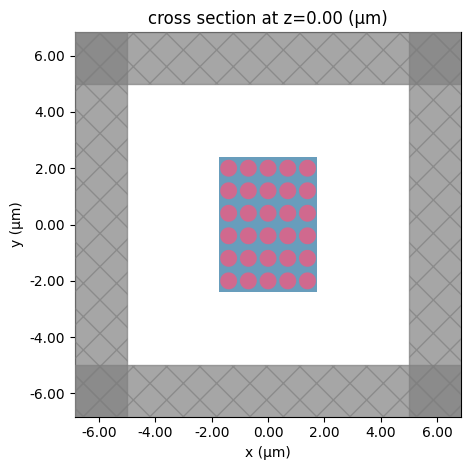

In [7]:
s = slab_square_array(
    0,
    0,
    0,
    0.3,
    0.7,
    0.8,
    5,
    6,
    0.4,
    td.Medium(permittivity=3.48**2),
    td.Medium(permittivity=1.003**2),
)

sim = td.Simulation(
    size=[10, 10, 10],
    grid_spec=td.GridSpec.auto(wavelength=1.55),
    structures=s,
    run_time=1,
)

sim.plot(z=0)
plt.show()

## Hexagonal Array of Holes

The function `slab_hex_array` returns a slab with a square array of holes with separately-defined medium. The slab has a tunable hole radius, spacing in both x and y directions, height, and array dimensions.

In [8]:
def slab_hex_array(
    x0,
    y0,
    z0,
    R,
    hole_spacing_x,
    hole_spacing_y,
    n_x,
    n_y,
    height,
    hole_medium,
    slab_medium,
    reference_plane="bottom",
    sidewall_angle=0,
    axis=2,
):
    # parameters
    # ------------------------------------------------------------
    # x0: x coordinate of center of the array (um)
    # y0: y coordinate of center of the array (um)
    # z0: z coordinate of center of the array (um)
    # R: radius of the circular holes (um)
    # hole_spacing_x: distance between centers of holes in x direction (um)
    # hole_spacing_y: distance between centers of holes in y direction (um)
    # n_x: number of holes in x direction
    # n_y: number of holes in y direction
    # height: height of array
    # hole_medium: medium of the holes
    # slab_medium: medium of the slab
    # reference_plane
    # sidewall_angle: angle slant of cylinders. Add compensation for the box geometry if != 0?
    # axis

    # define geometry for slab
    x_slab_length, y_slab_length = hole_spacing_x * (n_x + 0.5), hole_spacing_y * n_y
    start_x, start_y = (
        x0 - x_slab_length / 2 + hole_spacing_x / 2,
        y0 - y_slab_length / 2 + hole_spacing_y / 2,
    )
    box = td.Box(center=(x0, y0, z0), size=(x_slab_length, y_slab_length, height))

    structures = [td.Structure(geometry=box, medium=slab_medium)]

    cylinders = []
    for i in range(0, n_x):
        for j in range(0, n_y):
            c = td.Cylinder(
                axis=axis,
                sidewall_angle=sidewall_angle,
                reference_plane=reference_plane,
                radius=R,
                center=(
                    start_x + (i + (j % 2) * 0.5) * hole_spacing_x,
                    start_y + j * hole_spacing_y,
                    z0,
                ),
                length=height,
            )
            cylinders.append(c)

    cylinders_structure = td.Structure(
        geometry=td.GeometryGroup(geometries=cylinders), medium=hole_medium
    )

    structures.append(cylinders_structure)

    return structures

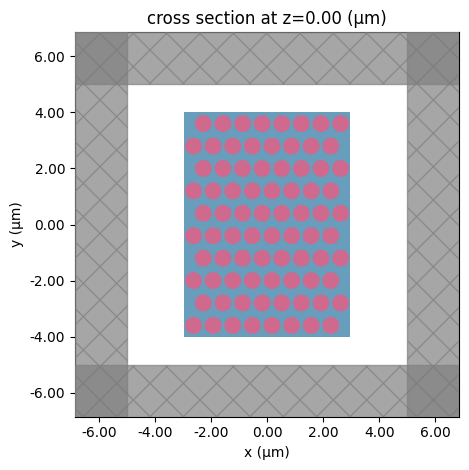

In [9]:
s = slab_hex_array(
    0,
    0,
    0,
    0.3,
    0.7,
    0.8,
    8,
    10,
    0.4,
    td.Medium(permittivity=3.48**2),
    td.Medium(permittivity=1.003**2),
)

sim = td.Simulation(
    size=[10, 10, 10],
    grid_spec=td.GridSpec.auto(wavelength=1.55),
    structures=s,
    run_time=1,
)

sim.plot(z=0)
plt.show()

## Rectangular Grating

The function `grating` returns a rectangular grating, with tunable height, thickness, tooth width, tooth height, tooth spacing, and tooth number.

In [10]:
def grating(
    x0,
    y0,
    z0,
    tooth_width,
    tooth_height,
    spacing,
    base_height,
    thickness,
    tooth_number,
    medium,
    reference_plane="bottom",
    sidewall_angle=0,
    axis=2,
):
    # parameters
    # ------------------------------------------------------------
    # x0: x coordinate of center of the grating (um)
    # y0: y coordinate of center of the grating (um)
    # z0: z coordinate of center of the grating (um)
    # tooth_width: width of each grating tooth (um)
    # tooth_height: height of each tooth (um)
    # spacing: spacing between teeth (um)
    # base_height: height of underlying base (um)
    # thickness: width of underlying base (um)
    # tooth_number: number of teeth in grating
    # medium: medium of the grating
    # reference_plane
    # sidewall_angle: angle of slant
    # axis

    x_length, z_length = (
        (tooth_width + spacing) * tooth_number - spacing,
        tooth_height + base_height,
    )
    start_x, start_z = x0 - x_length / 2, z0 + z_length / 2

    axisArray = [0, 1, 2]

    # create list of points as vertices for polyslab
    points = [(start_x, start_z), (start_x + tooth_width, start_z)]
    prevPoint = points[-1]
    # adding points for teeth
    for i in range(0, tooth_number - 1):
        points.append((prevPoint[0], prevPoint[1] - tooth_height))
        points.append((prevPoint[0] + spacing, prevPoint[1] - tooth_height))
        points.append((prevPoint[0] + spacing, prevPoint[1]))
        prevPoint = (prevPoint[0] + spacing + tooth_width, prevPoint[1])
        points.append(prevPoint)
    points.append((prevPoint[0], prevPoint[1] - z_length))
    points.append((prevPoint[0] - x_length, prevPoint[1] - z_length))

    grating = td.PolySlab(
        vertices=points,
        axis=axisArray[axis - 1],
        slab_bounds=(-thickness / 2, thickness / 2),
        sidewall_angle=sidewall_angle,
        reference_plane=reference_plane,
    )

    structure = td.Structure(geometry=grating, medium=medium)

    return structure

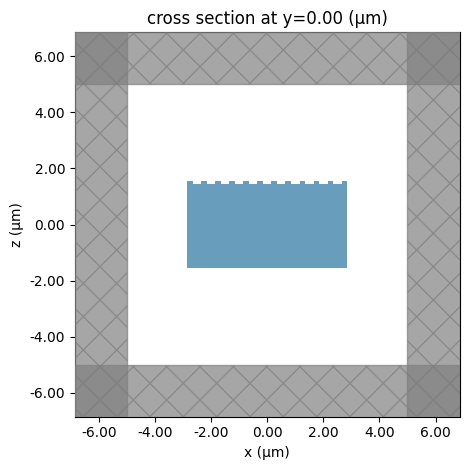

In [11]:
s = grating(0, 0, 0, 0.2, 0.1, 0.3, 3, 4, 12, td.Medium(permittivity=3.48**2))

sim = td.Simulation(
    size=[10, 10, 10], grid_spec=td.GridSpec.auto(wavelength=1.55), structures=[s], run_time=1
)

sim.plot(y=0)
plt.show()

## L Cavity

The function `hex_l_cavity` returns a hexagonal array of cylinders with an L cavity. It has tunable cylinder radius, cylinder spacing, height, cavity size, and separately tunable radii of cavity-bordering cylinders.

In [12]:
def hex_l_cavity(
    x0,
    y0,
    z0,
    R,
    side_R,
    spacing_x,
    spacing_y,
    n_x,
    n_y,
    l_number,
    height,
    medium,
    reference_plane="bottom",
    sidewall_angle=0,
    axis=2,
):
    # parameters
    # ------------------------------------------------------------
    # x0: x coordinate of center of the array (um)
    # y0: y coordinate of center of the array (um)
    # z0: z coordinate of center of the array (um)
    # R: radius of the cylinders (um)
    # side_R: radii of the two ends of the L-cavity (um)
    # hole_spacing_x: distance between centers of cylinders in x direction (um)
    # hole_spacing_y: distance between centers of cylinders in y direction (um)
    # n_x: number of cylinders in x direction
    # n_y: number of cylinders in y direction
    # l_number: number of cylinders removed from center (along x direction)
    # height: height of cylinders
    # medium: medium of the cylinders
    # reference_plane
    # sidewall_angle: angle slant of cylinders
    # axis

    cylinders = []
    if n_y % 2 == 0:
        n_y -= 1  # only odd numbers for n_y work for symmetry

    n_middle = n_x - n_x % 2 + l_number % 2

    for i in range(-(n_y // 2), n_y // 2 + 1):  # go up columns
        n_row = (
            n_middle + (i % 2) * (-1) ** l_number
        )  # calculates number of cylinders in current row
        for j in range(-n_row + 1, n_row + 1, 2):  # go along rows
            if i != 0 or abs(j) > l_number:  # don't populate cavity with cylinders
                var_radius = R
                if i == 0 and (abs(j) == l_number + 1):  # checks if cylinder is on side of cavity
                    var_radius = side_R
                c = td.Cylinder(
                    axis=axis,
                    sidewall_angle=sidewall_angle,
                    reference_plane=reference_plane,
                    radius=var_radius,
                    center=(x0 + j * spacing_x, y0 + i * spacing_y, z0),
                    length=height,
                )
                cylinders.append(c)
    structure = td.Structure(geometry=td.GeometryGroup(geometries=cylinders), medium=medium)
    return structure

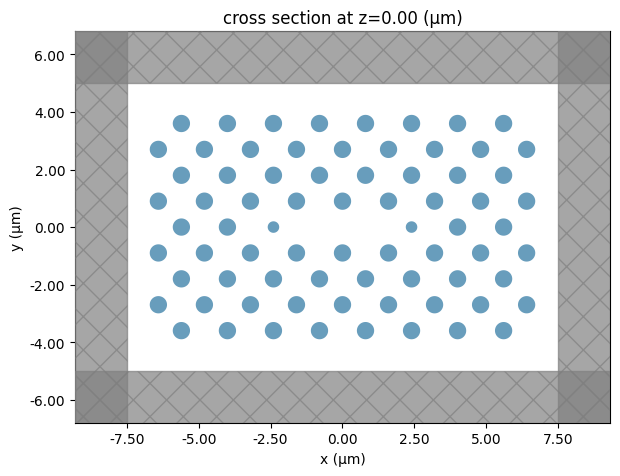

In [13]:
s = hex_l_cavity(0, 0, 0, 0.3, 0.2, 0.8, 0.9, 8, 10, 2, 1, td.Medium(permittivity=3.48**2))

sim = td.Simulation(
    size=[15, 10, 3], grid_spec=td.GridSpec.auto(wavelength=1.55), structures=[s], run_time=1
)

sim.plot(z=0)
plt.show()

## H Cavity 

The function `hex_h_cavity` returns a hexagon-shaped hexagonal array of cylinders with a hexagon-shaped cavity in the middle. Tunable cylinder radius, spacing, height, length in cylinders, and cavity size.

In [14]:
def hex_h_cavity(
    x0,
    y0,
    z0,
    R,
    n_side,
    h_number,
    spacing,
    height,
    medium,
    reference_plane="bottom",
    sidewall_angle=0,
    axis=2,
):
    # parameters
    # ------------------------------------------------------------
    # x0: x coordinate of center of the array (um)
    # y0: y coordinate of center of the array (um)
    # z0: z coordinate of center of the array (um)
    # R: radius of the cylinders (um)
    # n_side: maximum number of cylinders on hexagon side
    # h_number: maximum side number of hexagons that are removed
    # spacing: spacing between centers of cylinders
    # height: height of cylinders
    # medium: medium of the cylinders
    # reference_plane
    # sidewall_angle: angle slant of cylinders
    # axis

    cylinders = []
    for i in range(h_number + 1, n_side + 1):  # hexagon side length
        center_x, center_y = x0 + (i - 1) * spacing, y0
        for j in range(0, 6 - 5 * (i == 1)):  # iterate through hexagon sides
            for k in range(0, i - 1 + (i == 1)):  # iterate along each hexagon side
                center_x += spacing * np.cos(np.pi * 2 / 3 + j * np.pi / 3) * (i > 1)
                center_y += spacing * np.sin(np.pi * 2 / 3 + j * np.pi / 3) * (i > 1)
                c = td.Cylinder(
                    axis=axis,
                    sidewall_angle=sidewall_angle,
                    reference_plane=reference_plane,
                    radius=R,
                    center=(center_x, center_y, z0),
                    length=height,
                )
                cylinders.append(c)
    structure = td.Structure(geometry=td.GeometryGroup(geometries=cylinders), medium=medium)
    return structure

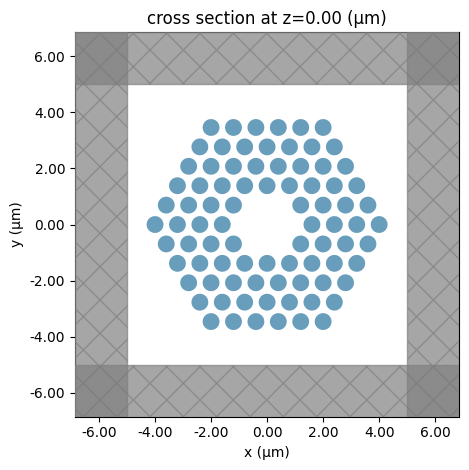

In [15]:
s = hex_h_cavity(0, 0, 0, 0.3, 6, 2, 0.8, 1, td.Medium(permittivity=3.48**2))

sim = td.Simulation(
    size=[10, 10, 3],
    grid_spec=td.GridSpec.auto(wavelength=1.55),
    structures=[s],
    run_time=2,
)

sim.plot(z=0)
plt.show()

## Wood Pile

The function `wood_pile` returns the popular 'wood pile' structure with tunable width of the blocks comprising the pile, width and height of the entire pile, number of blocks in each row, and number of rows of blocks.

In [16]:
def wood_pile(
    x0,
    y0,
    z0,
    block_width,
    side_width,
    pile_height,
    n_rows,
    n_floors,
    medium,
    reference_plane="bottom",
    axis=2,
):
    # parameters
    # ------------------------------------------------------------
    # x0: x coordinate of center of the array (um)
    # y0: y coordinate of center of the array (um)
    # z0: z coordinate of center of the array (um)
    # block_width: width of the blocks being stacked (um)
    # side_width: width of the wood pile (um)
    # pile_height: height of the wood pile (um)
    # n_rows: number of blocks on each floor
    # n_floors: number of stackings in the wood pile
    # medium: medium of the blocks
    # reference_plane
    # axis

    boxes = []
    spacing = 0.5 * side_width / n_rows
    for i in range(0, n_floors):
        for j in range(0, n_rows):
            b = td.Box(
                center=(
                    x0 + (0.5 - n_rows + 2 * j + (i % 4 == 2)) * spacing * ((i + 1) % 2),
                    y0 + (0.5 - n_rows + 2 * j + (i % 4 == 3)) * spacing * (i % 2),
                    z0 + pile_height * (-0.5 + 1 / n_floors / 2 + i / n_floors),
                ),
                size=(
                    block_width * ((i + 1) % 2) + side_width * (i % 2),
                    block_width * (i % 2) + side_width * ((i + 1) % 2),
                    pile_height / n_floors,
                ),
            )
            boxes.append(b)
    structure = td.Structure(geometry=td.GeometryGroup(geometries=boxes), medium=medium)
    return structure

In [17]:
s = wood_pile(0, 0, 0, 0.2, 1.2, 1.4, 4, 4, td.Medium(permittivity=3.48**2))

sim = td.Simulation(
    size=[3, 3, 3],
    grid_spec=td.GridSpec.auto(wavelength=1.55),
    structures=[s],
    run_time=1,
)

sim.plot_3d()

## FCC Sphere Array 

The function `fcc_pc` returns an FCC PC crystal of spheres, with tunable sphere radius, spacing, and number of spheres in each dimension.

In [18]:
def fcc_pc(x0, y0, z0, spacing, R, n_x, n_y, n_z, medium):
    # parameters
    # ------------------------------------------------------------
    # x0: x coordinate of center of the array (um)
    # y0: y coordinate of center of the array (um)
    # z0: z coordinate of center of the array (um)
    # spacing: spacing between the centers of the spheres (um)
    # R: radius of the spheres
    # n_x: number of spheres in x direction
    # n_y: number of spheres in y direction
    # n_z: number of spheres in z direction
    # medium: medium of the spheres

    spheres = []
    center_x, center_y, center_z = (
        x0 - (n_x - 1) * spacing,
        y0 - (n_y - 1) * spacing,
        z0 - (n_z - 1) * spacing,
    )
    for i in range(0, n_x):
        for j in range(0, n_y):
            for k in range(0, n_z):
                for l in range(0, 4):  # single crystal unit
                    s = td.Sphere(
                        center=(
                            center_x + (2 * i + (l % 3 == 0) * (-1) ** (l < 1)) * spacing,
                            center_y + (2 * j + 0.5 * (-1) ** (l % 2)) * spacing,
                            center_z + (2 * k + 0.5 * (-1) ** (l > 1)) * spacing,
                        ),
                        radius=R,
                    )
                    spheres.append(s)
    structure = td.Structure(geometry=td.GeometryGroup(geometries=spheres), medium=medium)
    return structure

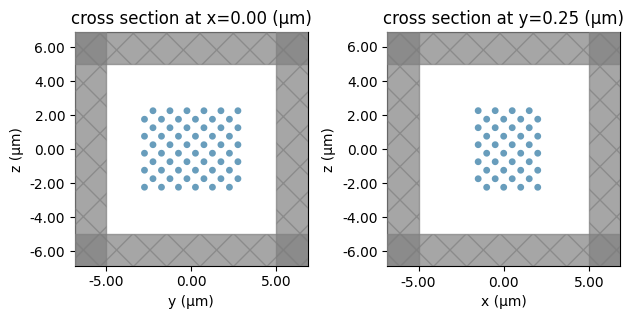

In [19]:
s = fcc_pc(0, 0, 0, 0.5, 0.2, 4, 6, 5, td.Medium(permittivity=3.48**2))

sim = td.Simulation(
    size=[10, 10, 10],
    grid_spec=td.GridSpec.auto(wavelength=1.55),
    structures=[s],
    run_time=1,
)

fig, ax = plt.subplots(1, 2)
sim.plot(x=0, ax=ax[0])
sim.plot(y=0.25, ax=ax[1])
plt.tight_layout()
plt.show()

## BCC Sphere Array 

The function `bcc_pc` returns a BCC PC crystal of spheres, with tunable sphere radius, spacing, and number of spheres in each dimension.

In [20]:
def bcc_pc(x0, y0, z0, spacing, R, n_x, n_y, n_z, medium):
    # parameters
    # ------------------------------------------------------------
    # x0: x coordinate of center of the array (um)
    # y0: y coordinate of center of the array (um)
    # z0: z coordinate of center of the array (um)
    # spacing: spacing between the centers of the spheres (um)
    # R: radius of the spheres
    # n_x: number of spheres in x direction
    # n_y: number of spheres in y direction
    # n_z: number of spheres in z direction
    # medium: medium of the spheres

    spheres = []
    center_x, center_y, center_z = (
        x0 - (n_x - 1) * spacing,
        y0 - (n_y - 1) * spacing,
        z0 - (n_z - 1) * spacing,
    )
    for i in range(0, n_x):
        for j in range(0, n_y):
            for k in range(0, 2 * n_z - 1):
                s = td.Sphere(
                    center=(
                        center_x + spacing * (2 * i + 0.5 * (-1) ** ((k + 1) % 2)),
                        center_y + spacing * (2 * j + 0.5 * (-1) ** (k % 2)),
                        center_z + k * spacing,
                    ),
                    radius=R,
                )
                spheres.append(s)
    structure = td.Structure(geometry=td.GeometryGroup(geometries=spheres), medium=medium)
    return structure

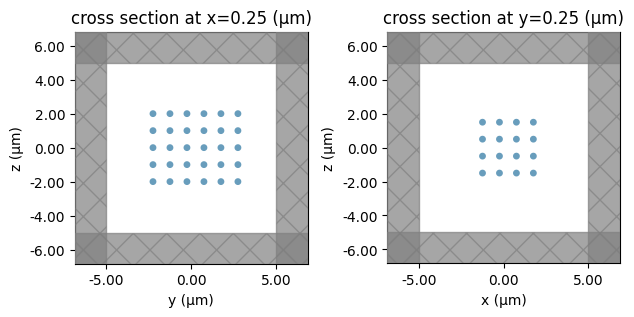

In [21]:
s = bcc_pc(0, 0, 0, 0.5, 0.2, 4, 6, 5, td.Medium(permittivity=3.48**2))

sim = td.Simulation(
    size=[10, 10, 10],
    grid_spec=td.GridSpec.auto(wavelength=1.55),
    structures=[s],
    run_time=1,
)

fig, ax = plt.subplots(1, 2)
sim.plot(x=0.25, ax=ax[0])
sim.plot(y=0.25, ax=ax[1])
plt.tight_layout()
plt.show()